In [ ]:
#Zhijie(Allen) Zhu  ZXZ200023. CS 4375.005 - Introduction to Machine Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

url ="https://raw.githubusercontent.com/Kuazk/test2/main/IRIS.csv"
data = pd.read_csv(url)
x = data.iloc[:, [0, 1]].values
data.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


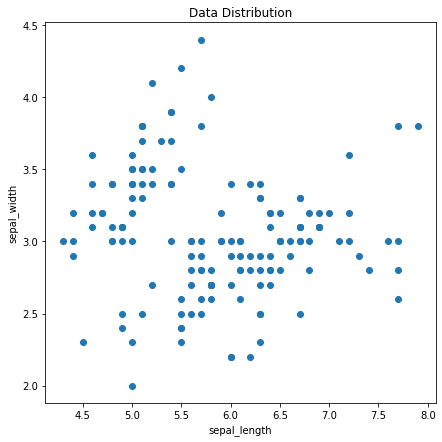

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(x[:,0],x[:,1])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Data Distribution')
plt.show()

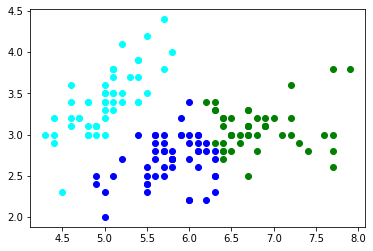

In [ ]:
# k-means

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

#predictions from kmeans
pred = kmeans.predict(x)
frame = pd.DataFrame(x)
frame['cluster'] = pred
frame.columns = ['sepal_weight', 'sepal_height', 'cluster']

#plotting results
color=['blue','green','cyan']
for k in range(0,3):
    kmean = frame[frame["cluster"]==k]
    plt.scatter(kmean['sepal_weight'],kmean['sepal_height'],c=color[k])
plt.show()



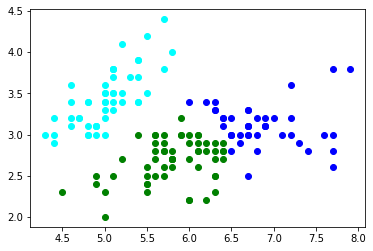

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(x)

#predictions from gmm
labels = gmm.predict(x)
frame = pd.DataFrame(x)
frame['cluster'] = labels
frame.columns = ['sepal_weight', 'sepal_height', 'cluster']

color=['blue','green','cyan']
for k in range(0,3):
    gamm = frame[frame["cluster"]==k]
    plt.scatter(gamm["sepal_weight"],gamm["sepal_height"],c=color[k])
plt.show()

In [ ]:
from sklearn.preprocessing import normalize
%matplotlib inline
data_scaled = normalize(x)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()

,0,1
0,0.824513,0.565842
1,0.852851,0.522154
2,0.826599,0.562791
3,0.829266,0.558853
4,0.811534,0.584305


In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

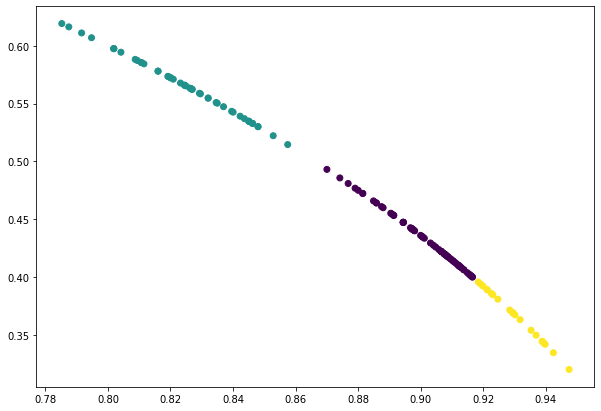

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled[0], data_scaled[1], c=cluster.labels_) 